In [1]:
import os
import pickle
from src.util import plotting_util as plot_util

REPO_DIR = os.path.join(os.getcwd(), "../../")
os.chdir(REPO_DIR)
METIENT_OUTPUT_DIR = os.path.join(REPO_DIR, 'src/data/tracerx_nsclc/metient_outputs')
ORCHARD_OUTPUT_DIR = os.path.join(METIENT_OUTPUT_DIR, 'pairtree_clustered_orchard_trees')
CONIPHER_OUTPUT_DIR = os.path.join(METIENT_OUTPUT_DIR, 'pyclone_clustered_conipher_trees')
TRACERX_DATA_DIR = os.path.join(REPO_DIR, "src/data/tracerx_nsclc/")

MONO_COLOR = "#6aa84fff"
POLY_COLOR = "#2496c8ff"

NOTE: Redirects are currently not supported in Windows or MacOs.


In [14]:
def get_patients(pickle_files_dir):
    patients = []
    for file in os.listdir(pickle_files_dir):
        if ".pickle" in file:
            patients.append(file.split(".")[0])
    print(f"{len(patients)} patients")
    return patients

def get_info(pickle_files_dir):
    patients = get_patients(pickle_files_dir)
    seeding_patterns = dict()
    monoclonal_ct = 0
    for patient in patients:
        file = open(os.path.join(pickle_files_dir, f"{patient}.pickle"),'rb')
        pckl = pickle.load(file)
        V = pckl['ancestral_labelings'][0]
        A = pckl['full_adjacency_matrices'][0]
        sites = pckl['ordered_anatomical_sites']
        G = plot_util.get_migration_graph(V, A)
        pattern = plot_util.get_seeding_pattern_from_migration_graph(G)
        if "monoclonal" in pattern:
            monoclonal_ct += 1
        seeding_patterns[patient] = pattern
    print(f"# monoclonal cases: {monoclonal_ct}, # polyclonal cases: {len(patients)-monoclonal_ct}")
    return seeding_patterns, monoclonal_ct



### Load metient outputs using various combinations of clustering alg + tree inference alg + metient hyperparams

In [23]:
# # (1) pyclone clusters + conipher trees + metient (maximum parsimony)
# conipher_mp_seeding_patterns, monoclonal_ct = get_info(os.path.join(CONIPHER_OUTPUT_DIR, 'max_pars'))

# (2) pyclone clusters + conipher trees + metient (maximum parsimony + genetic distance)
conipher_mp_gd_seeding_patterns, monoclonal_ct = get_info(os.path.join(CONIPHER_OUTPUT_DIR, 'max_pars_genetic_distance'))

# # (3) pairtree clusters + orchard trees + metient (maximum parsimony)
# conipher_mp_seeding_patterns, monoclonal_ct = get_info(os.path.join(ORCHARD_OUTPUT_DIR, 'max_pars'))

# # (4) pairtree clusters + orchard trees + metient (maximum parsimony + genetic distance)
# conipher_mp_gd_seeding_patterns, monoclonal_ct = get_info(os.path.join(ORCHARD_OUTPUT_DIR, 'max_pars_genetic_distance'))
conipher_mp_gd_seeding_patterns

128 patients
# monoclonal cases: 57, # polyclonal cases: 71


{'CRUK0495_primary_SU_T2': 'monoclonal single-source seeding',
 'CRUK0284_primary_SU_T1': 'polyclonal single-source seeding',
 'CRUK0497_primary_SU_T1': 'polyclonal single-source seeding',
 'CRUK0041_primary_SU_T1': 'no seeding',
 'CRUK0236_primary_SU_T1': 'monoclonal single-source seeding',
 'CRUK0418_primary_SU_T1': 'no seeding',
 'CRUK0737_primary_SU_T1': 'monoclonal single-source seeding',
 'CRUK0044_primary_SU_T1': 'monoclonal single-source seeding',
 'CRUK0872_primary_SU_T1': 'polyclonal single-source seeding',
 'CRUK0245_primary_SU_T1': 'polyclonal single-source seeding',
 'CRUK0584_primary_SU_T1': 'monoclonal single-source seeding',
 'CRUK0693_primary_SU_T1': 'no seeding',
 'CRUK0325_primary_SU_T1': 'polyclonal single-source seeding',
 'CRUK0361_primary_SU_T1': 'monoclonal single-source seeding',
 'CRUK0572_primary_SU_T1': 'monoclonal single-source seeding',
 'CRUK0453_primary_SU_T1': 'monoclonal single-source seeding',
 'CRUK0412_primary_SU_T1': 'no seeding',
 'CRUK0636_primar

### Get sample info

In [24]:
import pandas as pd
sample_info_df= pd.read_csv(os.path.join(TRACERX_DATA_DIR,"sample_overview_original.txt"), sep="\t")
print(sample_info_df.head())


  patient_id tumour_id             region  sampleType sampleTypeDetail
0   CRUK0010  CRUK0010  CRUK0010_SU_T1.R1     primary          primary
1   CRUK0010  CRUK0010  CRUK0010_SU_T1.R2     primary          primary
2   CRUK0010  CRUK0010   CRUK0010_SU_FLN1  metastasis               LN
3   CRUK0010  CRUK0010    CRUK0010_BR_LN1  metastasis  metachronousMet
4   CRUK0010  CRUK0010    CRUK0010_BR_LN2  metastasis  metachronousMet


### How often are samples monoclonal vs. polyclonal?

{'mono_poly': ['monoclonal', 'polyclonal', 'polyclonal', 'monoclonal', 'monoclonal', 'monoclonal', 'polyclonal', 'polyclonal', 'monoclonal', 'polyclonal', 'monoclonal', 'monoclonal', 'monoclonal', 'monoclonal', 'polyclonal', 'monoclonal', 'monoclonal', 'polyclonal', 'polyclonal', 'polyclonal', 'monoclonal', 'monoclonal', 'monoclonal', 'polyclonal', 'monoclonal', 'polyclonal', 'monoclonal', 'monoclonal', 'monoclonal', 'polyclonal', 'monoclonal', 'monoclonal', 'polyclonal', 'monoclonal', 'polyclonal', 'polyclonal', 'polyclonal', 'monoclonal', 'monoclonal', 'polyclonal', 'polyclonal', 'polyclonal', 'monoclonal', 'monoclonal', 'polyclonal', 'polyclonal', 'polyclonal', 'monoclonal', 'monoclonal', 'polyclonal', 'polyclonal', 'monoclonal', 'polyclonal', 'polyclonal', 'polyclonal', 'polyclonal', 'monoclonal', 'polyclonal', 'monoclonal', 'monoclonal', 'polyclonal', 'monoclonal', 'polyclonal', 'monoclonal', 'monoclonal', 'polyclonal', 'polyclonal', 'polyclonal', 'polyclonal', 'monoclonal', 'poly

/Users/divyakoyyalagunta/mambaforge/envs/met/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 49.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/divyakoyyalagunta/mambaforge/envs/met/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 28.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/divyakoyyalagunta/mambaforge/envs/met/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 49.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/divyakoyyalagunta/mambaforge/envs/met/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 28.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(ms

<Figure size 640x480 with 0 Axes>

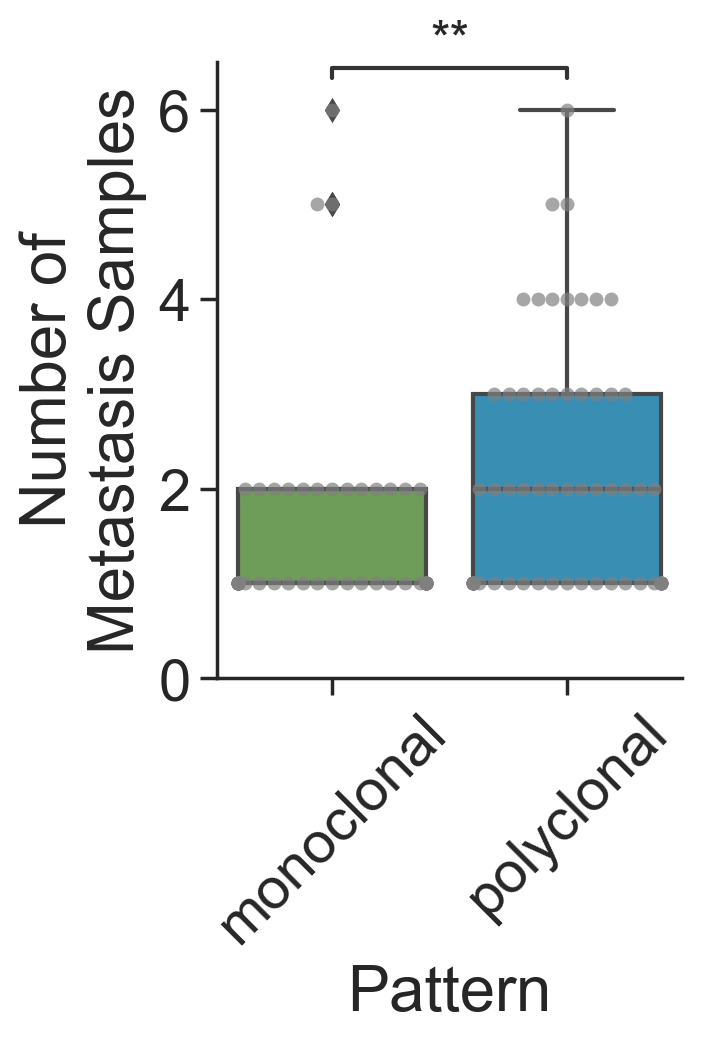

In [25]:
def get_num_met_samples(patient_id):
    sample_types = sample_info_df[sample_info_df['patient_id']==patient_id]['sampleType']
    return sample_types.value_counts()['metastasis']
    
data = {"mono_poly" : [], "num_samples" : []}
for key, pattern in conipher_mp_gd_seeding_patterns.items():
    patient = key.split("_")[0]
    # TODO: investigate these no seeding cases
    if (pattern.split()[0]=="no"):
        continue
    data["mono_poly"].append(pattern.split()[0])
    data["num_samples"].append(get_num_met_samples(patient))
print(data)
import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation

sns.set(font_scale=1.9)
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.despine()
fig = plt.figure(figsize=(3, 4), dpi=200)
palette = {"monoclonal":MONO_COLOR, "polyclonal":POLY_COLOR}
snsfig = sns.boxplot(x='mono_poly', y='num_samples', data=data, order=["monoclonal", "polyclonal"], linewidth=1.5, palette=palette, showfliers=True)
sns.swarmplot(x='mono_poly', y='num_samples', data=data, color="grey", dodge=False, alpha=0.7)  # Scatter plot
add_stat_annotation(snsfig, data=data, x='mono_poly', y='num_samples',
                    box_pairs=[("monoclonal", "polyclonal")], test='t-test_welch', text_format='star', loc='inside', verbose=1, fontsize=18, comparisons_correction=None)
plt.ylim(0, 6.5) 
plt.xlabel("Pattern")
plt.ylabel("Number of \nMetastasis Samples")
plt.xticks(rotation=45)
snsfig.spines['top'].set_visible(False)
snsfig.spines['right'].set_visible(False)
fig.savefig(os.path.join(REPO_DIR, "src/test", f"mono_vs_poly_num_samples.png"), dpi=600, bbox_inches='tight', pad_inches=0.5) 

<Figure size 640x480 with 0 Axes>

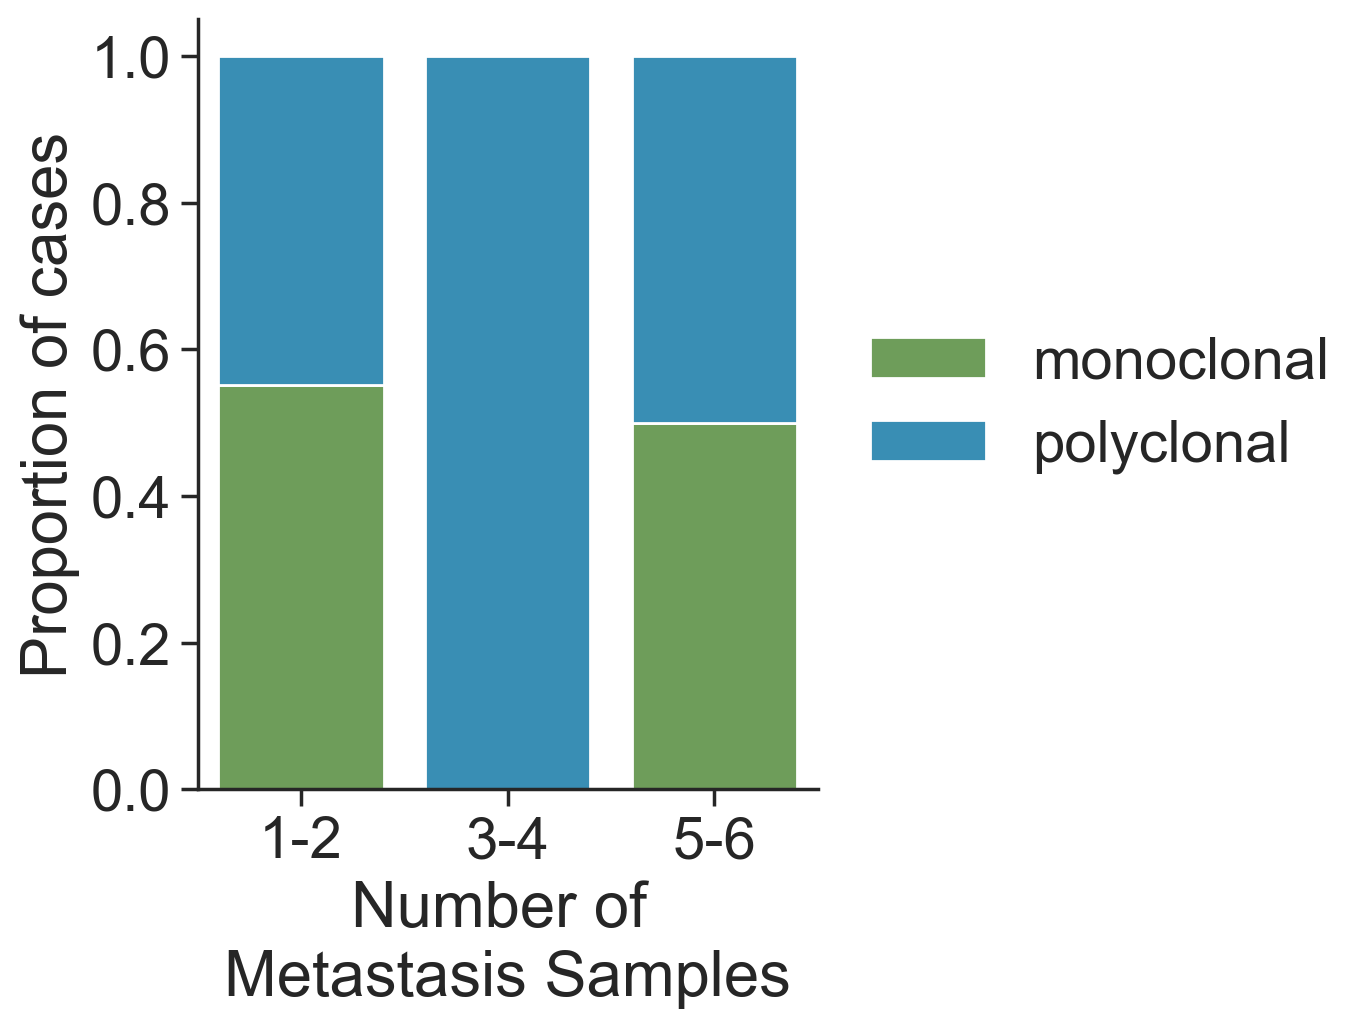

In [26]:
sns.set(font_scale=1.9)
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.despine()
fig = plt.figure(figsize=(4, 5), dpi=200)
palette = {"monoclonal":"#00A088", "polyclonal":"#3B5587"}

# Create a DataFrame
df = pd.DataFrame(data)

# Define the num_sites ranges
df['num_samples_range'] = pd.cut(df['num_samples'], bins=[0, 2, 4, 6], labels=["1-2", "3-4", "5-6"])

# Calculate the proportions of monoclonal and polyclonal within each range
proportions = df.groupby(['num_samples_range', 'mono_poly']).size().unstack(fill_value=0).div(df.groupby('num_samples_range').size(), axis=0)

# Reset the index
proportions.reset_index(inplace=True)

# Create a stacked bar plot
ax1 = sns.barplot(x='num_samples_range', y='monoclonal', data=proportions, color=MONO_COLOR, label='monoclonal')
ax2 = sns.barplot(x='num_samples_range', y='polyclonal', data=proportions, color=POLY_COLOR, bottom=proportions['monoclonal'], label='polyclonal')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Add labels and legend
plt.xlabel("Number of \nMetastasis Samples")
plt.ylabel("Proportion of cases")
plt.title("")
plt.legend(title="",  loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)

# Show the plot
plt.show()
fig.savefig(os.path.join(REPO_DIR, "src/test", f"mono_vs_poly_prop_num_samples.png"), dpi=600, bbox_inches='tight', pad_inches=0.5) 

In [27]:
df[["mono_poly", "num_samples_range"]].value_counts()

mono_poly   num_samples_range
monoclonal  1-2                  54
polyclonal  1-2                  44
            3-4                  17
monoclonal  5-6                   3
polyclonal  5-6                   3
Name: count, dtype: int64

### What is the distribution of dissemination patterns?

      mono_poly         source   patient
0    monoclonal  single-source  CRUK0495
1    polyclonal  single-source  CRUK0284
2    polyclonal  single-source  CRUK0497
3            no        seeding  CRUK0041
4    monoclonal  single-source  CRUK0236
..          ...            ...       ...
123  monoclonal  single-source  CRUK0368
124  polyclonal  single-source  CRUK0748
125  polyclonal  single-source  CRUK0003
126  monoclonal  single-source  CRUK0089
127  polyclonal  single-source  CRUK0467

[128 rows x 3 columns]


<Figure size 640x480 with 0 Axes>

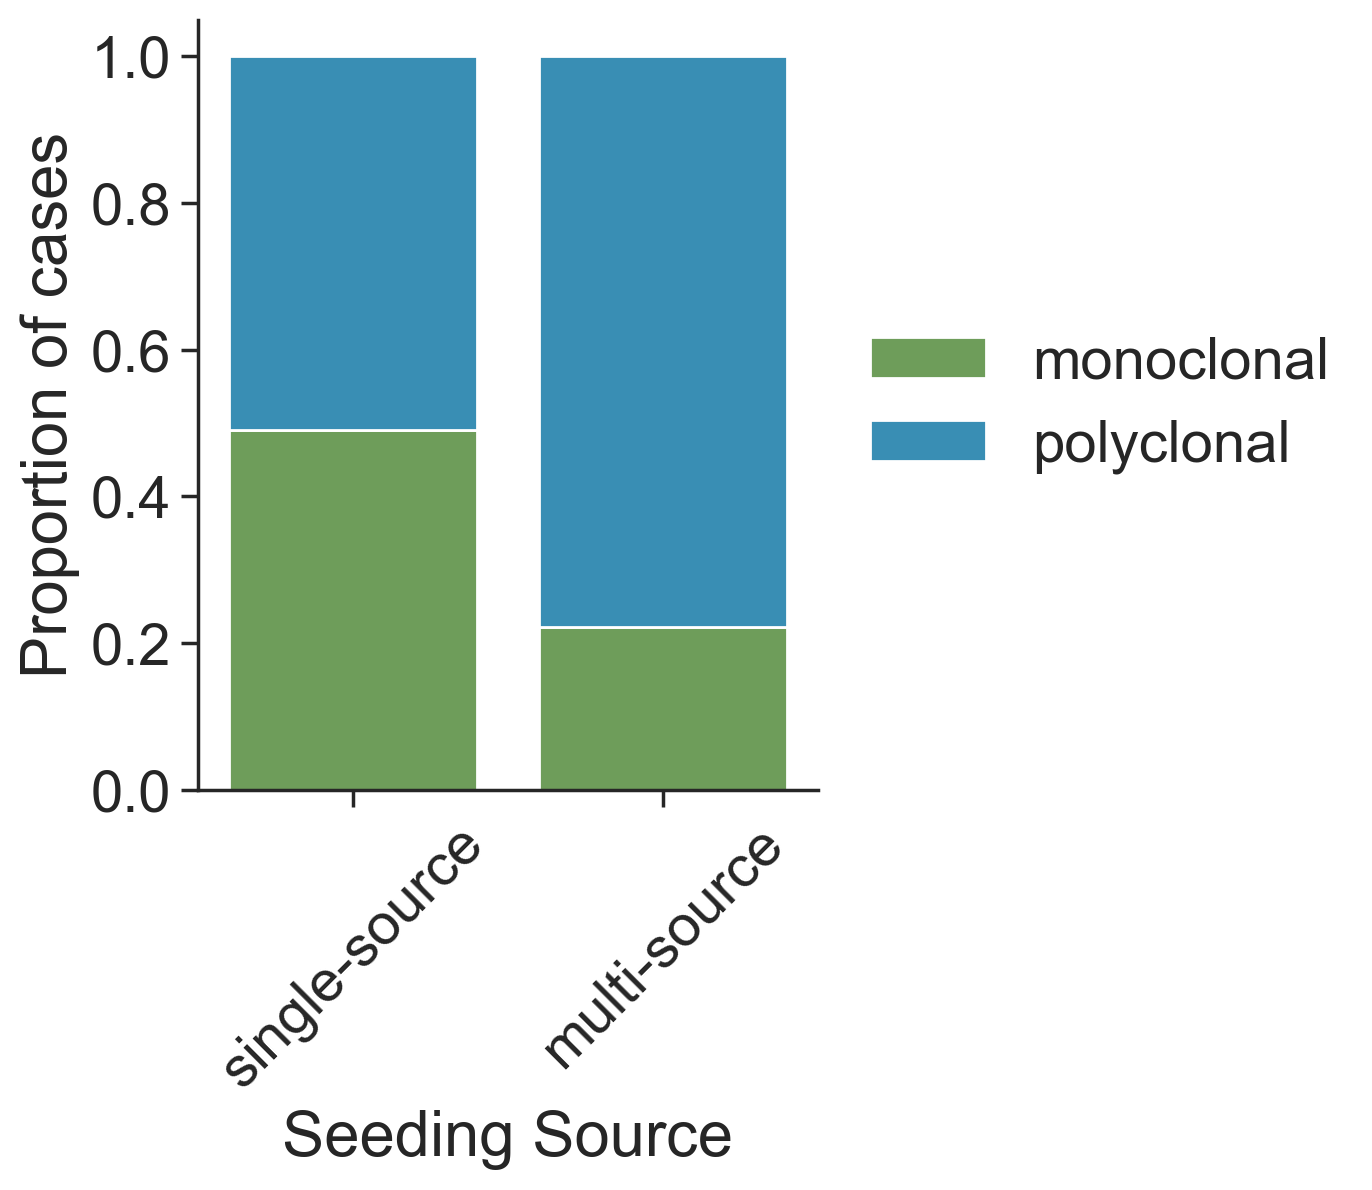

In [29]:
data = {"mono_poly" : [], "source" : [], "patient":[]}
for key, pattern in conipher_mp_gd_seeding_patterns.items():
    patient = key.split("_")[0]
    data["patient"].append(patient)
    data["mono_poly"].append(pattern.split()[0])
    data["source"].append(pattern.split()[1])

# Create a DataFrame
df = pd.DataFrame(data)
print(df)

# Reorder the DataFrame based on the custom order
custom_order = ["single-source", "multi-source",]
df['source'] = pd.Categorical(df['source'], categories=custom_order, ordered=True)
df.sort_values('source', inplace=True)

# Calculate the proportions of monoclonal and polyclonal within each source
proportions = df.groupby(['source', 'mono_poly']).size().unstack(fill_value=0).div(df.groupby('source').size(), axis=0)

# Reset the index
proportions.reset_index(inplace=True)

sns.set(font_scale=1.9)
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.despine()
fig = plt.figure(figsize=(4, 5), dpi=200)

# Create a stacked bar plot,
ax1 = sns.barplot(x='source', y='monoclonal', data=proportions, color="#6aa84fff", label='monoclonal')
ax2 = sns.barplot(x='source', y='polyclonal', data=proportions, color="#2496c8ff", bottom=proportions['monoclonal'], label='polyclonal')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Add labels and legend
plt.xlabel("Seeding Source")
plt.ylabel("Proportion of cases")
plt.xticks(rotation=45)
plt.title("")
plt.legend(title="",  loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)

# Show the plot
plt.show()
fig.savefig(os.path.join(REPO_DIR, "src/test", f"source_and_seeding_distribution.png"), dpi=600, bbox_inches='tight', pad_inches=0.5) 

In [31]:
df[["mono_poly", "source"]].value_counts()

mono_poly   source       
polyclonal  single-source    57
monoclonal  single-source    55
polyclonal  multi-source      7
monoclonal  multi-source      2
Name: count, dtype: int64

In [32]:
df[df["source"]=="multi-source"]

,mono_poly,source,patient
63,monoclonal,multi-source,CRUK0256
57,polyclonal,multi-source,CRUK0484
44,polyclonal,multi-source,CRUK0465
112,polyclonal,multi-source,CRUK0530
111,polyclonal,multi-source,CRUK0590
110,polyclonal,multi-source,CRUK0714
92,monoclonal,multi-source,CRUK0087
69,polyclonal,multi-source,CRUK0090
33,polyclonal,multi-source,CRUK0557
